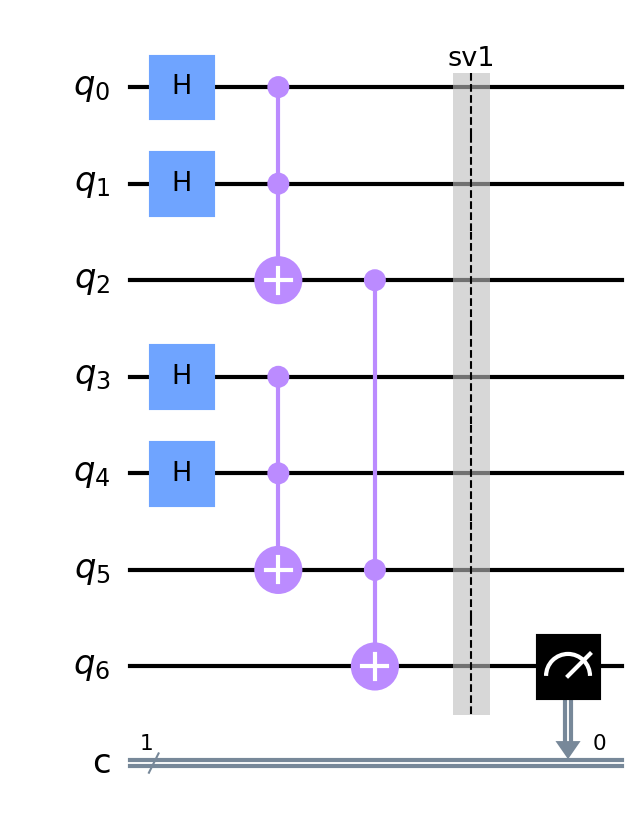

<IPython.core.display.Math object>

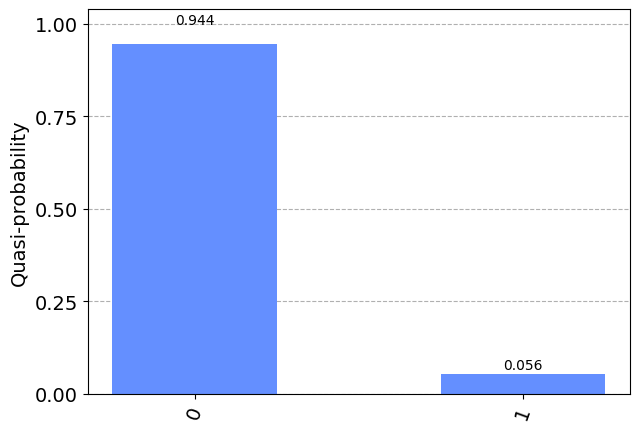

In [2]:
"""quantum_circuit3.ipynb"""
# Cell 1: Implement the circuit and display the probability histogram for q6 for 1,024 shots.

# Based on code created by @dbiersach

from __future__ import annotations

import typing

import numpy as np
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_bloch_multivector  # type: ignore
from qiskit.visualization import plot_distribution  # type: ignore
from qiskit.visualization import plot_state_qsphere  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Create backend Aer simulator in order to take shots
backend: Any = Aer.get_backend("aer_simulator")

# Create a quantum circuit with 7 qubits and 1 classical bit
qc: Any = QuantumCircuit(7, 1)

# Apply Hadamard gate to q0, q1, q3, and q4
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)
# Apply CCNOTs
qc.ccx(0, 1, 2)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
# Take state vector
qc.save_statevector("sv1")
# Measure q6 and store in classical bit
qc.measure(6, 0)

# Execute the circuit with 1,024 shots
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

# Store data for the state vector
sv1: Any = result.data(0)["sv1"]

# Draw the circuit
display(qc.draw(output="mpl", scale=1.5))

# Display state vector 1
display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))

# Display the probability distribution for the state of q6
display(plot_distribution(counts))

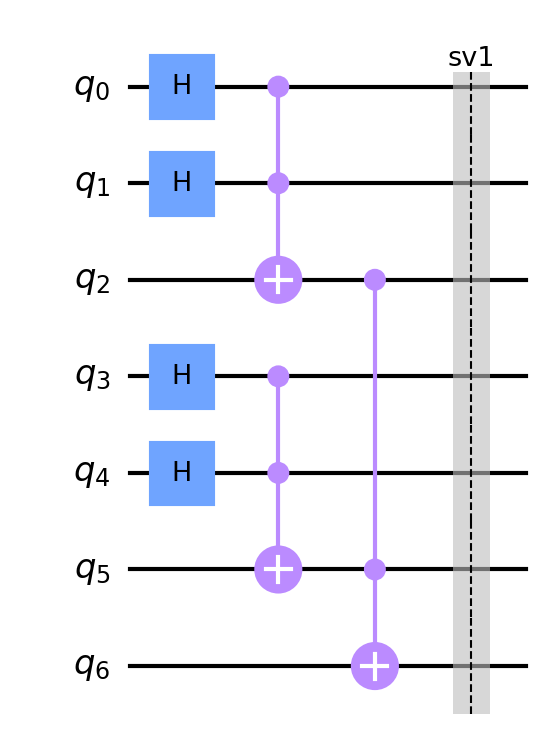

<IPython.core.display.Math object>

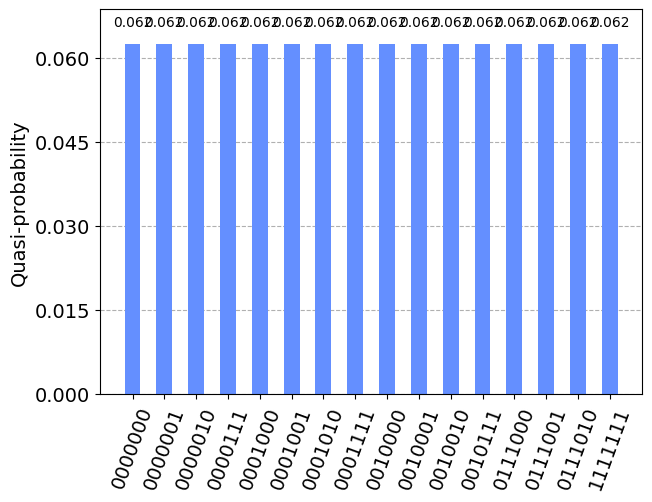

In [3]:
# Cell 2: Execute same circuit as above, but this time display probabilities for the final state
# vector rather than measuring qubits.

# Call the Aer state vector simulator
backend: Any = Aer.get_backend("statevector_simulator")

# Create same quantum circuit as above
qc: Any = QuantumCircuit(7)

# Apply Hadamard gate to q0, q1, q3, and q4
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)
# Apply CCNOTs
qc.ccx(0, 1, 2)
qc.ccx(3, 4, 5)
qc.ccx(2, 5, 6)
# Take state vector
qc.save_statevector("sv1")

# Get probability results for the final state vector
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

# Store data for the state vector
sv1: Any = result.data(0)["sv1"]

# Draw the circuit
display(qc.draw(output="mpl", scale=1.5))

# Display state vector 1
display(as_latex(sv1, prefix=r"\mathbf{Statevector\;1}="))

# Display the probability distribution for the final state vector
display(plot_distribution(counts))

In [ ]:
# Cell 3: Explain the probability that q6 is measured as 1 if there is no quantum noise.

"""As shown in Cell 2, there are 16 possible final states the quantum register could assume when 
measured.  However, q6 is only equal to 1 in one of those possible final states.  So, the probability q6
is measured as 1 is 1/16 or 0.0625%, as seen in Cell 1 where the probability of measuring 1 for
q6 is roughly 0.0625% after 1,024 shots."""